# Introduction 

This Dataset is composed of 6 columns with each column having 9568 entries. The different data included in this dataset should help us to make some prediction, in this case the goal is to predict net hourly electrical energy output.The issue is which method to use and which variables will have an efficient use to make the prediction.

In [3]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/sarahbismuth/datascience1/master/M2_Data.csv')

In [4]:
df.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
T     9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
EP    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


In [6]:
#check if there is null value in the Dataframe
df.isnull().sum()

T     0
V     0
AP    0
RH    0
EP    0
dtype: int64

In [7]:
#Some stat for the Dataframe
df.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# EDA

In [8]:
import matplotlib. pyplot as plt
import seaborn as sns

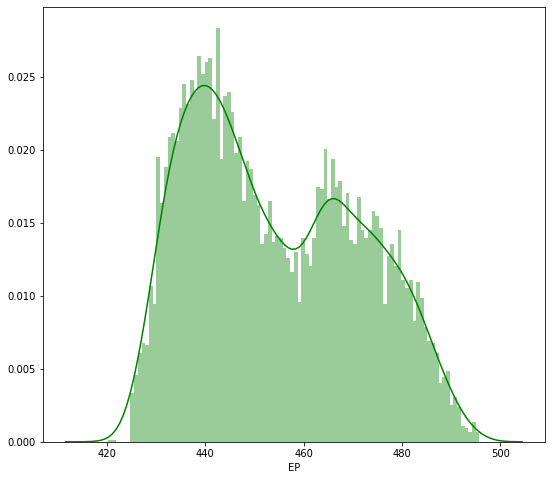

In [9]:
#Distribution of Houly electrical energy output 
plt.figure(figsize=(9,8))
sns.distplot(df['EP'], color='g', bins=100, hist_kws={'alpha':0.4})

We can see a majority  of the variable  distributed where EP= 440 that's where we can find the highest peak.
We can also see another peak smaller than the first one around EP=465

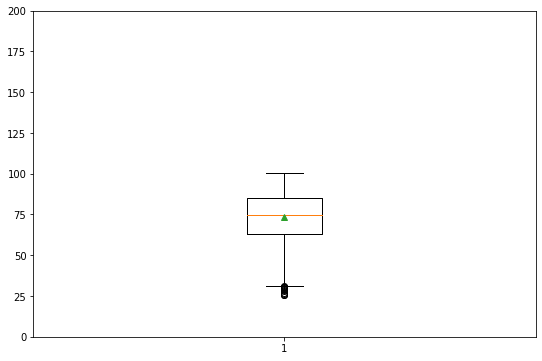

In [16]:
#Box plot of RH 
cc=df['RH']
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)    
bp = ax.boxplot(cc, showmeans=True)
plt.ylim(0, 200)
plt.show()


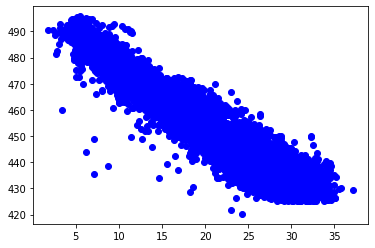

In [11]:
#Scatter plot 
plt.scatter('T', 'EP', c='b', data=df)


From this scatter plot we can see that temperature and EP are strongly negatively  correlated 

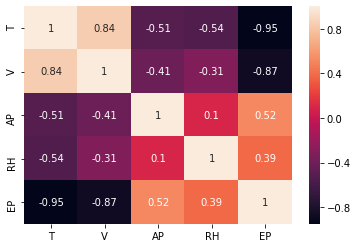

In [37]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Above you can see the correlation network of all the variables of the dataframe

# Linear regression 

For the 2 models I have decided to chooose K=3, I tought that due to the fact that I have 6 columns it was more appropriate than using a traditional value K=5

In [68]:

from sklearn.model_selection import cross_val_score

In [69]:
#First case 
from sklearn.model_selection import train_test_split
X =  df[['AP', 'RH']]
y = df['EP']
#split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [70]:
 from sklearn.linear_model import LinearRegression
# Create model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# Calculate our y hat (how our model performs against the test data held off)
y_hat_test = linreg.predict(X_test)

In [71]:
y_hat_test

array([443.46994536, 448.14922771, 464.13606781, ..., 448.05694919,
       477.07385597, 461.97116541])

In [72]:
#fit the model using 3-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg, X, y, cv=3)

In [73]:
print(scores)

[0.37788675 0.38375025 0.38997913]


In [74]:
import numpy as np

# calculate the average accuracy across all 3 folds
np.mean(scores)

0.3838720408763348

Our 3 fold cross validation shows that our model has a cross validated accuracy of 38.39%

In [ ]:
#same process with different variables: This tie V and T 

In [49]:

from sklearn.model_selection import cross_val_score

In [56]:
from sklearn.model_selection import train_test_split
X =  df[['V', 'T']]
y = df['EP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [57]:
from sklearn.linear_model import LinearRegression
# Create model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# Calculate our y hat (how our model performs against the test data held off)
y_hat_test = linreg.predict(X_test)

In [58]:
y_hat_test

array([446.50170956, 438.32993832, 445.77720895, ..., 459.28600101,
       466.07296963, 439.41330838])

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg, X, y, cv=3)

In [63]:
print(scores)

[0.91508999 0.91679869 0.91522349]


In [64]:
import numpy as np

# calculate the average accuracy across all 3 folds
np.mean(scores)

0.9157040542596135

Our 3-fold cross validation shows that our model has a cross validated accuracy of 91.6%

# Conclusion 

Using V and T to predict EP is more appropriate than using AP and RH since the cross validated accuracy is higher.Thus, based on the results of the average accuracy with K=3 my preferred model is the second one.